# Airbnb prices
## by 'Sola Okeleji
### Import Libraries

In [1890]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
import plotly.graph_objects as go
import plotly.express as px
import datetime as dt
from statistics import mean
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import scipy
from scipy import stats
from numpy.random import random
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_rows", None)

print ('Modules imported')

Modules imported


### Read datasets

In [1891]:
pd.set_option('display.max_columns', None)
df= pd.read_excel('/kaggle/input/linear-regression-winter-2024-airbnb-prices/data_dictionary.xlsx')
train_df = pd.read_csv('/kaggle/input/linear-regression-winter-2024-airbnb-prices/train_regression.csv')
test_df =pd.read_csv('/kaggle/input/linear-regression-winter-2024-airbnb-prices/test_regression.csv')
sample = pd.read_csv('/kaggle/input/linear-regression-winter-2024-airbnb-prices/sample_submission.csv')

Check the data_dictionary (df) to understand the data columns

In [1892]:
df.head()

,Field,Type,Calculated,Description,Reference
0,id,integer,NaN,Airbnb's unique identifier for the listing,NaN
1,host_id,integer,NaN,Airbnb's unique identifier for the host/user,NaN
2,host_since,date,NaN,The date the host/user was created. For hosts ...,NaN
3,host_location,text,NaN,The host's self reported location,NaN
4,host_response_time,NaN,NaN,NaN,NaN


In [1893]:
#check shape of both datasets
print(train_df.shape)
print(test_df.shape)

(5000, 54)
(3338, 53)


In [1894]:
# Find columns in test_df that are not in train_df
columns_not_in_test = set(train_df.columns) - set(test_df.columns)
print("Columns in test_df that are not in train_df:", columns_not_in_test)

# Find columns in train_df that are not in test_df
columns_not_in_train = set(test_df.columns) - set(train_df.columns)
print("Columns in train_df that are not in test_df:", columns_not_in_train)

Columns in test_df that are not in train_df: {'price'}
Columns in train_df that are not in test_df: set()


Price is not in test_df, as we will have to predict it. Let's explore the dataset, and also handle missing values, starting with the train_df dataset.

## Cleaning and Exploration of Train dataset

In [1895]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5000 non-null   int64  
 1   host_id                                       5000 non-null   int64  
 2   host_since                                    5000 non-null   object 
 3   host_location                                 4042 non-null   object 
 4   host_response_time                            4582 non-null   object 
 5   host_response_rate                            4582 non-null   object 
 6   host_acceptance_rate                          4709 non-null   object 
 7   host_is_superhost                             4977 non-null   object 
 8   host_neighbourhood                            4873 non-null   object 
 9   host_listings_count                           5000 non-null   i

In [1896]:
#have a glimpse of the dataset
train_df.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,26774767,366516391,2018-04-09,"Chicago, IL",within an hour,96%,95%,f,Back of the Yards,11,13,"['email', 'phone']",t,t,New City,41.794240,-87.661380,Private room in rental unit,Private room,1,1 shared bath,1.0,$30.00,32,1125,32,32,1125,1125,32.0,1125.0,t,30,60,90,365,18,0,0,2019-06-16,2022-08-12,4.94,5.00,4.89,5.00,5.00,4.28,4.83,f,9,1,8,0,0.33
1,775792777857790668,50276775,2014-12-23,NaN,within an hour,100%,97%,f,Clearwater Beach,1141,2346,"['email', 'phone']",t,t,Near North Side,41.892749,-87.620711,Room in hotel,Private room,12,3 baths,3.0,"$1,247.00",32,365,32,32,365,365,32.0,365.0,t,25,49,66,135,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,58,0,58,0,NaN
2,33948525,681680651,2020-03-08,NaN,within an hour,100%,100%,f,Lake View East,1,1,['phone'],t,t,Lake View,41.948160,-87.652309,Entire rental unit,Entire home/apt,6,1 bath,3.0,$214.00,2,45,2,2,45,45,2.0,45.0,t,0,0,0,0,14,14,1,2023-07-21,2023-12-03,4.87,5.00,5.00,5.00,5.00,4.93,4.80,f,1,1,0,0,2.78
3,569476879862677256,94345291,2015-10-22,"Chicago, IL",within an hour,100%,98%,f,Bucktown,55,58,"['email', 'phone', 'work_email']",t,t,Hyde Park,41.801030,-87.597160,Entire rental unit,Entire home/apt,2,1 bath,1.0,$59.00,2,180,2,2,180,180,2.0,180.0,t,23,53,83,355,13,13,3,2023-09-02,2023-12-06,4.08,4.08,4.00,4.38,4.23,4.54,3.85,t,55,55,0,0,3.61
4,36537053,790998106,2021-04-04,"Chicago, IL",within an hour,100%,100%,t,Near South Side,74,75,"['email', 'phone']",t,t,Near South Side,41.855770,-87.624130,Entire rental unit,Entire home/apt,6,2 baths,3.0,$151.00,2,365,2,2,1125,1125,2.0,1125.0,t,0,0,0,0,64,42,3,2022-05-06,2023-12-06,4.80,4.74,4.75,4.83,4.85,4.74,4.72,t,74,74,0,0,3.24


It can be observed that 'Price' column is an object datatype. Let's convert to Float for best practice and to make it easier to work with/predict.

In [1897]:
train_df['price'] = train_df['price'].replace('[\$,]', '', regex=True).astype(float)

In [1898]:
#check for missing values
missing =pd.isnull(train_df).sum().sort_values(ascending = False).loc[pd.isnull(train_df).sum()!= 0].to_frame(name= 'Count')
missing

,Count
reviews_per_month,1042
review_scores_cleanliness,1042
first_review,1042
last_review,1042
review_scores_communication,1042
review_scores_accuracy,1041
review_scores_value,1041
review_scores_rating,1041
review_scores_checkin,1041
review_scores_location,1041


In [1899]:
#get the data type of columns with missing data
missing_data_count = pd.isnull(train_df).sum().sort_values(ascending=False).loc[pd.isnull(train_df).sum() != 0].to_frame(name='Count')

data_types = train_df.dtypes.to_frame(name='Data Type')

# Merge the two dfs on the column names
result = pd.merge(missing_data_count, data_types, left_index=True, right_index=True)

result

,Count,Data Type
reviews_per_month,1042,float64
review_scores_cleanliness,1042,float64
first_review,1042,object
last_review,1042,object
review_scores_communication,1042,float64
review_scores_accuracy,1041,float64
review_scores_value,1041,float64
review_scores_rating,1041,float64
review_scores_checkin,1041,float64
review_scores_location,1041,float64


### Handle missing data
Drop rows with missing 'beds' and 'bathrooms_text' as we do not want to predict that.
Replace missing values with mode for object or integer columns, and mean for float columns.

In [1900]:
#drop rows with misisng 'beds' and 'bathrooms_text' as we do not want to predict that
#train_df = train_df.dropna(subset=['beds', 'bathrooms_text'])

#Replace missing values with mode for object or integer columns, and mean for float columns
for column in train_df.columns:
    if train_df[column].dtype == 'object' or train_df[column].dtype == 'int64':
        # Replace missing values with mode for object or integer columns
        train_df[column] = train_df[column].fillna(train_df[column].mode().iloc[0])
    elif train_df[column].dtype == 'float64':
        # Replace missing values with mean for float columns
        train_df[column] = train_df[column].fillna(train_df[column].mean())
        
#check missing values again
pd.isnull(train_df).sum().sort_values(ascending = False).loc[pd.isnull(train_df).sum()!= 0].to_frame(name= 'Count')

,Count


### Test Dataset: Handle missing data

In [1901]:
#have a glimpse of the dataset
test_df.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1034230914292810598,760775794,2020-12-16,NaN,within a day,88%,80%,f,Near West Side,44,44,"['email', 'phone']",t,t,Lincoln Park,41.931102,-87.667468,Entire rental unit,Entire home/apt,14,1 bath,1.0,32,730,32,32,730,730,32.0,730.0,t,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,44,2,42,0,NaN
1,26579870,214868994,2016-12-16,"New York, NY",within an hour,100%,97%,f,Cambridge,4820,6438,"['email', 'phone', 'work_email']",t,t,Near North Side,41.891162,-87.622263,Entire rental unit,Entire home/apt,2,1 bath,1.0,32,1125,32,366,1125,1125,354.2,1125.0,t,0,1,31,306,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,643,643,0,0,NaN
2,27063669,497520971,2019-03-14,NaN,within an hour,99%,99%,t,West Loop/Greektown,71,88,['phone'],t,t,Near North Side,41.895350,-87.626040,Entire rental unit,Entire home/apt,8,2 baths,3.0,3,344,2,3,1125,1125,2.2,1125.0,t,20,47,77,344,11,11,2,2023-05-28,2023-12-02,4.73,4.91,5.00,4.82,4.91,4.91,4.64,t,51,51,0,0,1.61
3,21423682,48776231,2014-12-02,"Chicago, IL",within an hour,100%,100%,t,Streeterville,14,47,"['email', 'phone']",t,t,Near North Side,41.891376,-87.620269,Entire rental unit,Entire home/apt,4,1 bath,1.0,32,1125,32,32,1125,1125,32.0,1125.0,t,30,60,90,365,6,2,0,2021-05-04,2023-08-02,4.67,5.00,5.00,4.67,4.83,5.00,4.67,f,14,14,0,0,0.19
4,633433690826539871,514928878,2019-04-22,NaN,within a day,100%,65%,f,River North,20,22,"['email', 'phone']",t,t,Near North Side,41.894760,-87.625640,Entire condo,Entire home/apt,3,1 bath,1.0,32,365,32,32,365,365,32.0,365.0,t,0,15,45,45,3,1,0,2022-06-03,2023-05-03,4.67,4.00,4.67,4.67,4.67,5.00,4.67,f,19,19,0,0,0.16


In [1902]:
#check for missing values
missing =pd.isnull(test_df).sum().sort_values(ascending = False).loc[pd.isnull(test_df).sum()!= 0].to_frame(name= 'Count')
missing

,Count
reviews_per_month,688
first_review,688
last_review,688
review_scores_value,683
review_scores_rating,683
review_scores_accuracy,683
review_scores_cleanliness,683
review_scores_checkin,683
review_scores_location,683
review_scores_communication,683


In [1903]:
#get the data type of columns with missing data
missing_data_count = pd.isnull(test_df).sum().sort_values(ascending=False).loc[pd.isnull(test_df).sum() != 0].to_frame(name='Count')

data_types = test_df.dtypes.to_frame(name='Data Type')

# Merge the two dfs on the column names
result_test = pd.merge(missing_data_count, data_types, left_index=True, right_index=True)

result_test

,Count,Data Type
reviews_per_month,688,float64
first_review,688,object
last_review,688,object
review_scores_value,683,float64
review_scores_rating,683,float64
review_scores_accuracy,683,float64
review_scores_cleanliness,683,float64
review_scores_checkin,683,float64
review_scores_location,683,float64
review_scores_communication,683,float64


In [1904]:
#Replace missing values with mode for object columns, and mean for float columns
for column in test_df.columns:
    if test_df[column].dtype == 'object':
        # Replace missing values with mode for object or integer columns
        test_df[column] = test_df[column].fillna(test_df[column].mode().iloc[0])
    elif test_df[column].dtype == 'float64':
        # Replace missing values with mean for float columns
        test_df[column] = test_df[column].fillna(test_df[column].mean())
        
#check missing values again
pd.isnull(test_df).sum().sort_values(ascending = False).loc[pd.isnull(test_df).sum()!= 0].to_frame(name= 'Count')

,Count


### Feature Selection
Now working with Train dataset- Use Heatmap to identify strong correlations to determine which columns are potentially beneficial for predicting "price". We need need to drop the latitude and longitude variables, as the 'host neighbourhood' accounts for this.

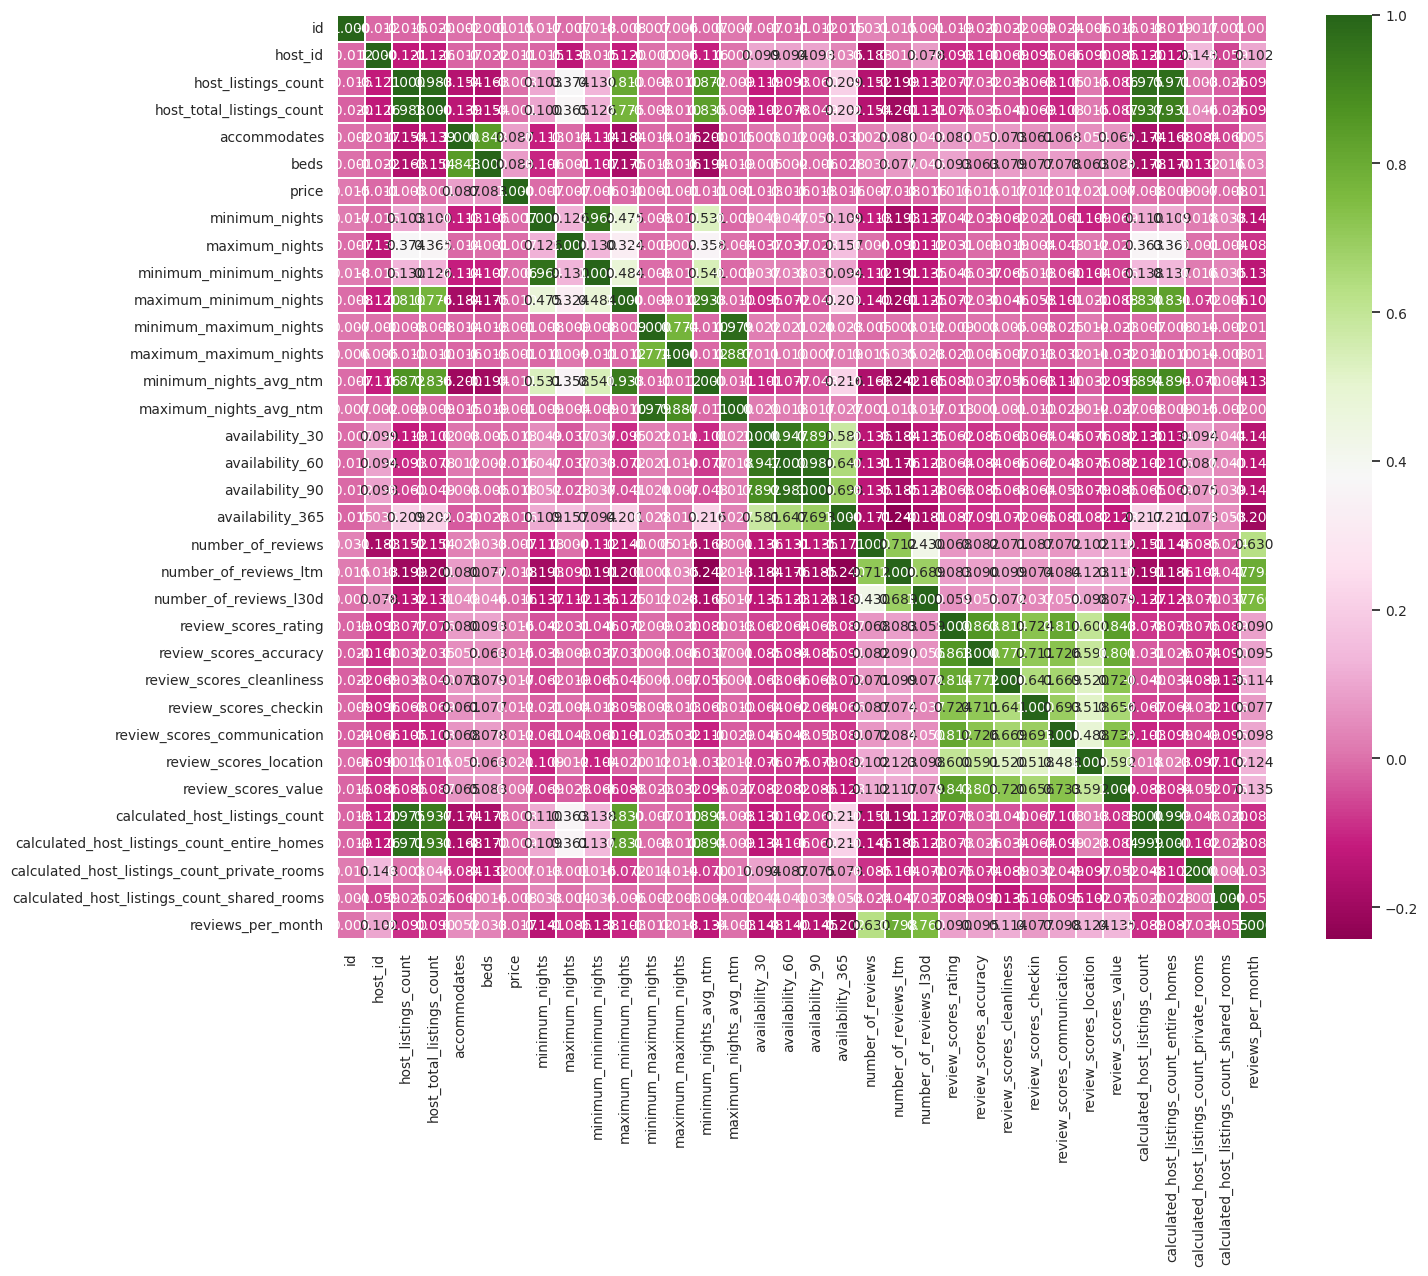

In [1905]:
columns_to_remove = ['latitude', 'longitude']
train_df = train_df.drop(columns=columns_to_remove)

#get numeric data for correlation
numeric_columns = train_df.select_dtypes(include=['int','float']).columns
numerictrain_df = train_df[numeric_columns]

#correlation 
sns.set(font_scale=0.9)
plt.figure(figsize=(15, 12))
ax = sns.heatmap(numerictrain_df.corr(), annot=True, annot_kws={'size': 10}, fmt='.3f', cmap='PiYG', linewidths=.2)
plt.show()

Let's go ahead to initially transform the objects datatype columns using LabelEncoder.
Then, we willl use Random Forest to understand the impact of each category, by checking feature importance scores. The columns where the feature importance is greater than 0.006 will be selected

In [1906]:
# Apply label encoding to all object columns in train_df
label_encoder = LabelEncoder()
train_df_encoded = train_df.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'O' else col)

#Train a RandomForestRegressor model with categorical variables
model = RandomForestRegressor()
X = train_df_encoded.drop('price', axis=1)
y = train_df_encoded['price']
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

#get the selected features that are relavant to 'price'
selected_features = feature_importances[feature_importances > 0.006].index
selected_features

Index(['maximum_maximum_nights', 'bathrooms_text', 'accommodates',
       'host_neighbourhood', 'maximum_nights', 'availability_365',
       'minimum_maximum_nights',
       'calculated_host_listings_count_private_rooms', 'property_type',
       'availability_90', 'id', 'review_scores_rating', 'host_since', 'beds',
       'host_is_superhost', 'host_id', 'host_identity_verified',
       'review_scores_cleanliness', 'reviews_per_month', 'number_of_reviews',
       'host_response_time', 'last_review'],
      dtype='object')

In [1907]:
#also include 'price'
df_train = train_df[['maximum_maximum_nights', 'bathrooms_text', 'host_neighbourhood',
         'host_identity_verified',
       'calculated_host_listings_count_private_rooms',
       'review_scores_cleanliness', 'availability_365',
        'host_since', 'property_type', 'beds',
        'neighbourhood_cleansed', 'reviews_per_month','accommodates',
       'number_of_reviews_ltm', 'host_response_time','id','price']]

## Data Visualization
We will be working with df_train from now, which is the reduced df that contains features more important to 'price'. We need to clean the variables with outliers.
#### Check for Outliers


In [1908]:
numeric = df_train.select_dtypes(include=['int','float']).columns
train_numeric_df = df_train[numeric]

fig = px.box(train_numeric_df, y=train_numeric_df.drop(['price'], axis=1).columns, title='Box Plots of the Stat Sig. variables')
fig.show()

#### maximum_maximum_nights

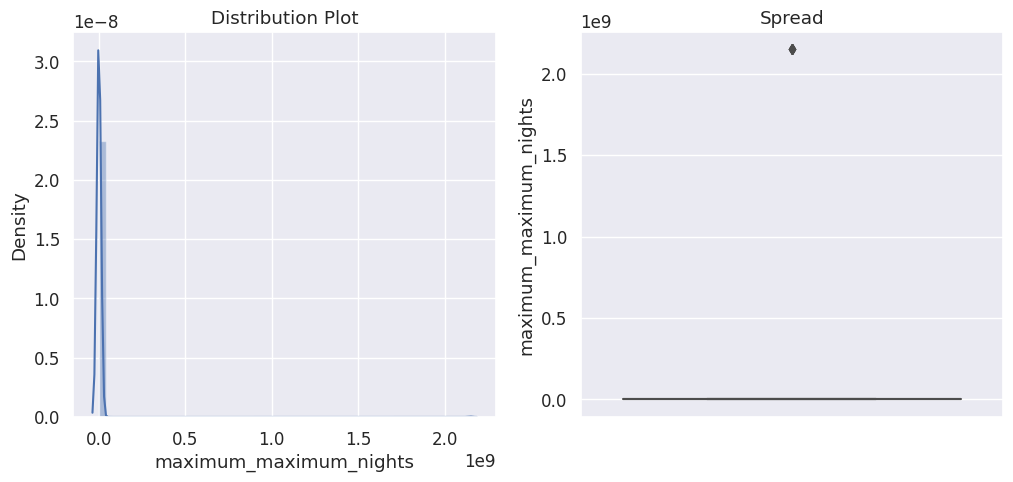

In [1909]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(df_train.maximum_maximum_nights)

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=df_train.maximum_maximum_nights)

plt.show()

There are 5 records with an outlier. value = 2147483647. This needs to be dealt with

In [1910]:
#quick outlier removal 
df_train =df_train[df_train['maximum_maximum_nights'] <= 2147483646]

In [1911]:
train_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   maximum_maximum_nights                        5000 non-null   int64  
 1   calculated_host_listings_count_private_rooms  5000 non-null   int64  
 2   review_scores_cleanliness                     5000 non-null   float64
 3   availability_365                              5000 non-null   int64  
 4   beds                                          5000 non-null   float64
 5   reviews_per_month                             5000 non-null   float64
 6   accommodates                                  5000 non-null   int64  
 7   number_of_reviews_ltm                         5000 non-null   int64  
 8   id                                            5000 non-null   int64  
 9   price                                         5000 non-null   f

#### price

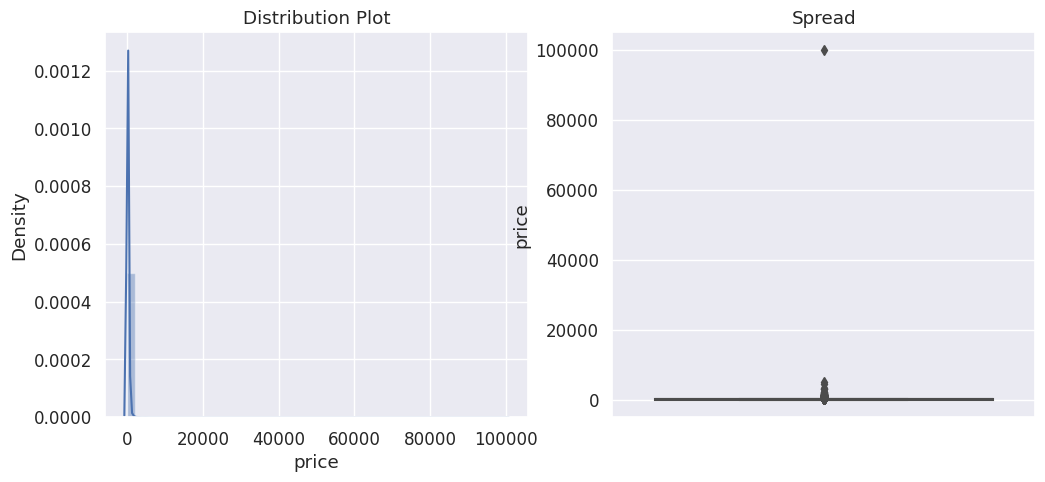

In [1912]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(df_train.price  )

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=df_train.price   )

plt.show()

In [1913]:
#quick outlier removal 
df_train =df_train[df_train['price'] <= 2500]

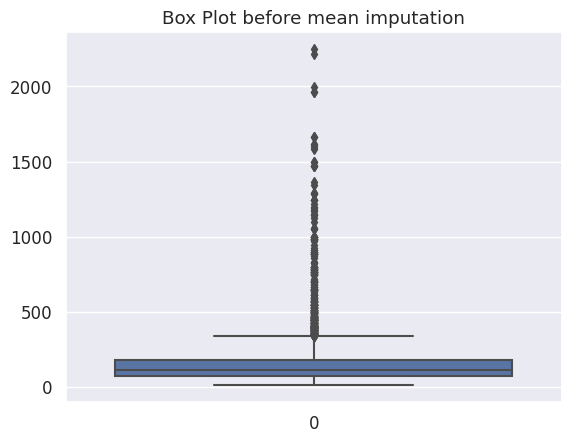

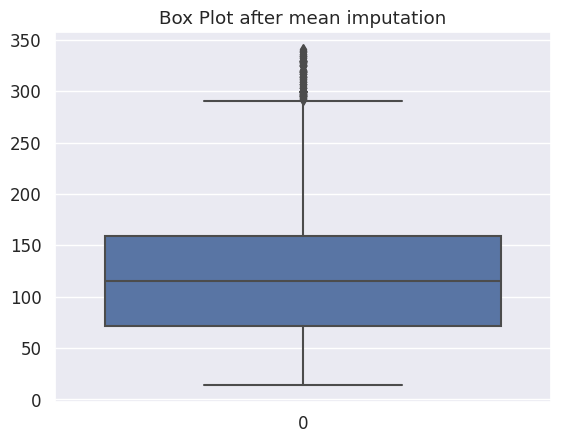

In [1914]:
sns.boxplot(df_train['price'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_train['price'].quantile(0.25)
q3 = df_train['price'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_train['price'])
for i in df_train['price']:
    if i > Upper_tail or i < Lower_tail:
            df_train['price'] = df_train['price'].replace(i, m)
sns.boxplot(df_train['price'])
plt.title("Box Plot after mean imputation")
plt.show()

#### reviews_per_month

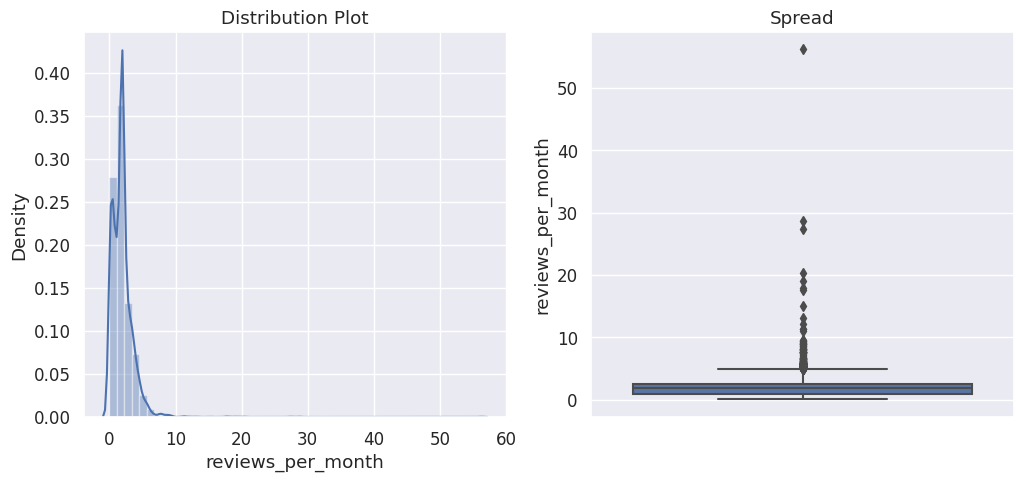

In [1915]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(df_train.reviews_per_month  )

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=df_train.reviews_per_month  )

plt.show()

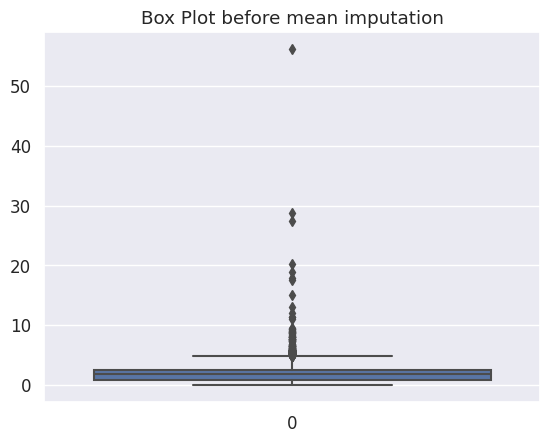

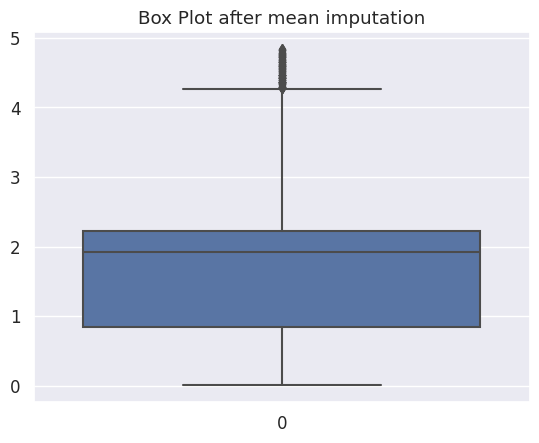

In [1916]:
sns.boxplot(df_train['reviews_per_month'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_train['reviews_per_month'].quantile(0.25)
q3 = df_train['reviews_per_month'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_train['reviews_per_month'])
for i in df_train['reviews_per_month']:
    if i > Upper_tail or i < Lower_tail:
            df_train['reviews_per_month'] = df_train['reviews_per_month'].replace(i, m)
sns.boxplot(df_train['reviews_per_month'])
plt.title("Box Plot after mean imputation")
plt.show()

#### beds

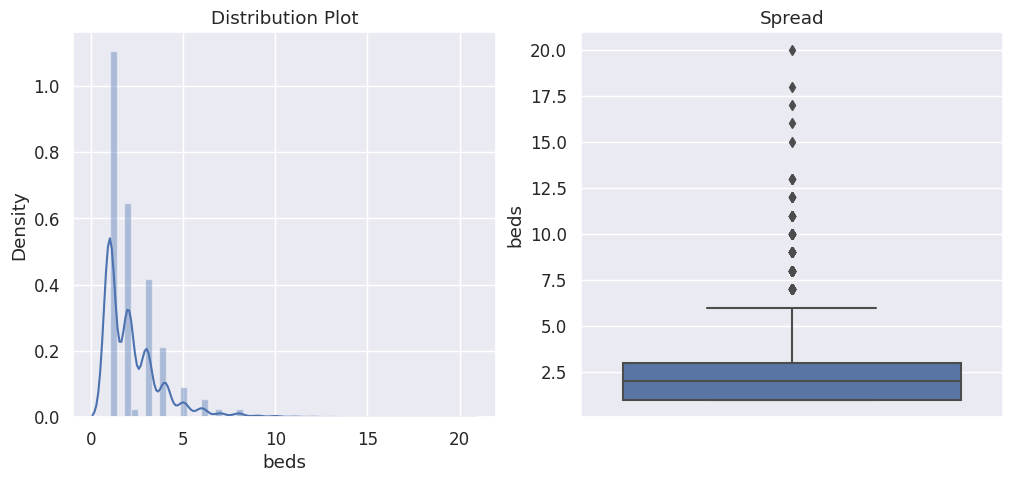

In [1917]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(df_train.beds )

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=df_train.beds )

plt.show()

#### number_of_reviews_ltm

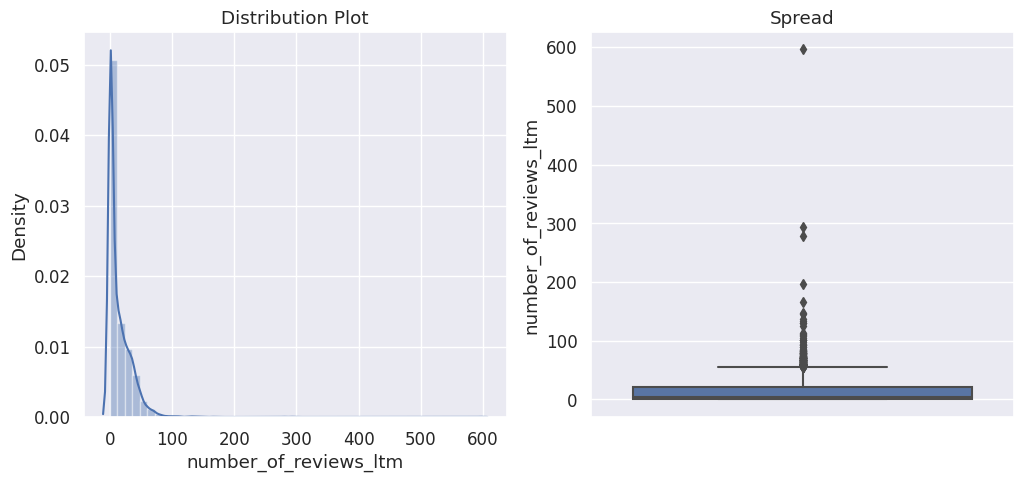

In [1918]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(df_train.number_of_reviews_ltm)

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=df_train.number_of_reviews_ltm)

plt.show()

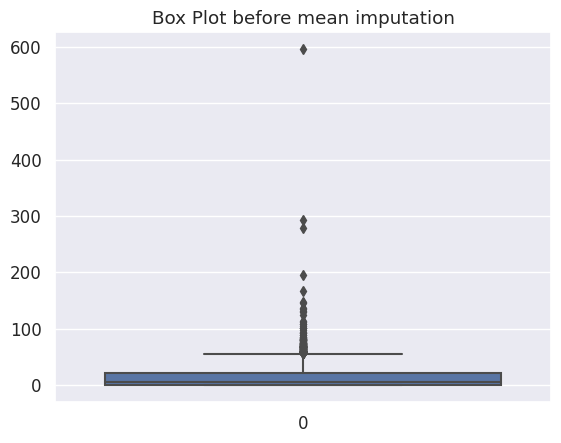

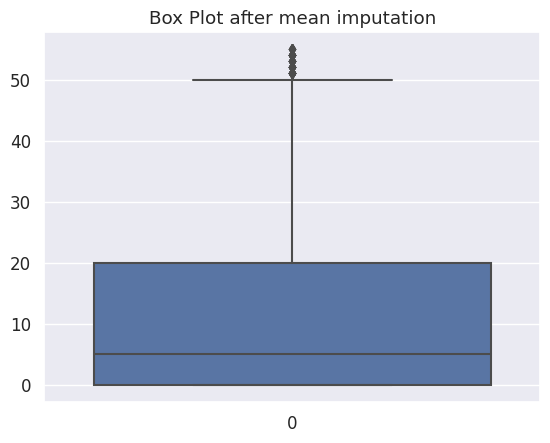

In [1919]:
sns.boxplot(df_train['number_of_reviews_ltm'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_train['number_of_reviews_ltm'].quantile(0.25)
q3 = df_train['number_of_reviews_ltm'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.round(np.mean(df_train['number_of_reviews_ltm']))
for i in df_train['number_of_reviews_ltm']:
    if i > Upper_tail or i < Lower_tail:
            df_train['number_of_reviews_ltm'] = df_train['number_of_reviews_ltm'].replace(i, m)
sns.boxplot(df_train['number_of_reviews_ltm'])
plt.title("Box Plot after mean imputation")
plt.show()

#### calculated_host_listings_count_private_rooms

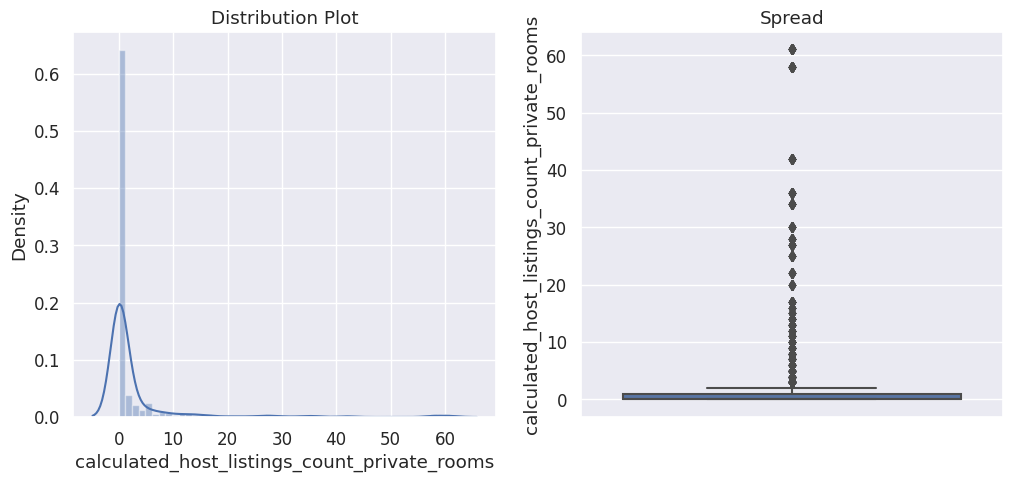

In [1920]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(df_train.calculated_host_listings_count_private_rooms)

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=df_train.calculated_host_listings_count_private_rooms)

plt.show()

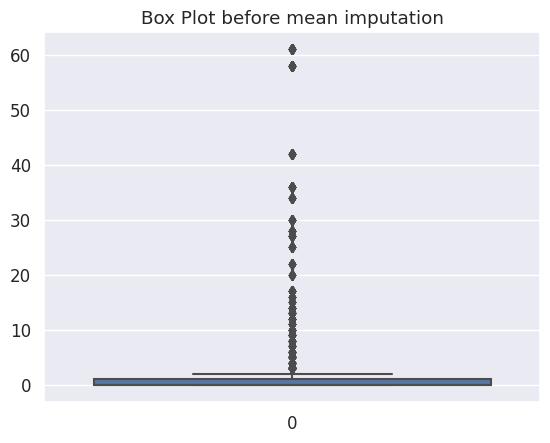

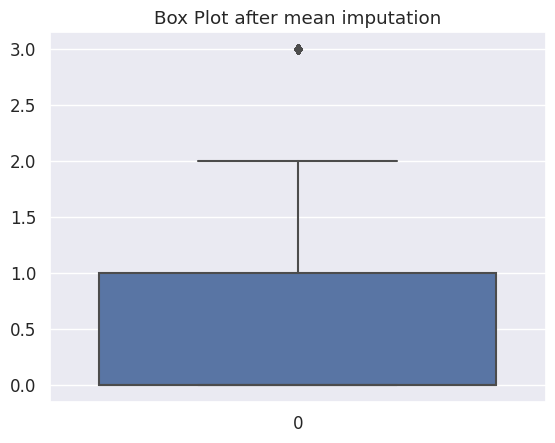

In [1921]:
sns.boxplot(df_train['calculated_host_listings_count_private_rooms'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_train['calculated_host_listings_count_private_rooms'].quantile(0.25)
q3 = df_train['calculated_host_listings_count_private_rooms'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.round(np.mean(df_train['calculated_host_listings_count_private_rooms']))
for i in df_train['calculated_host_listings_count_private_rooms']:
    if i > Upper_tail or i < Lower_tail:
            df_train['calculated_host_listings_count_private_rooms'] = df_train['calculated_host_listings_count_private_rooms'].replace(i, m)
sns.boxplot(df_train['calculated_host_listings_count_private_rooms'])
plt.title("Box Plot after mean imputation")
plt.show()

#### review_scores_cleanliness

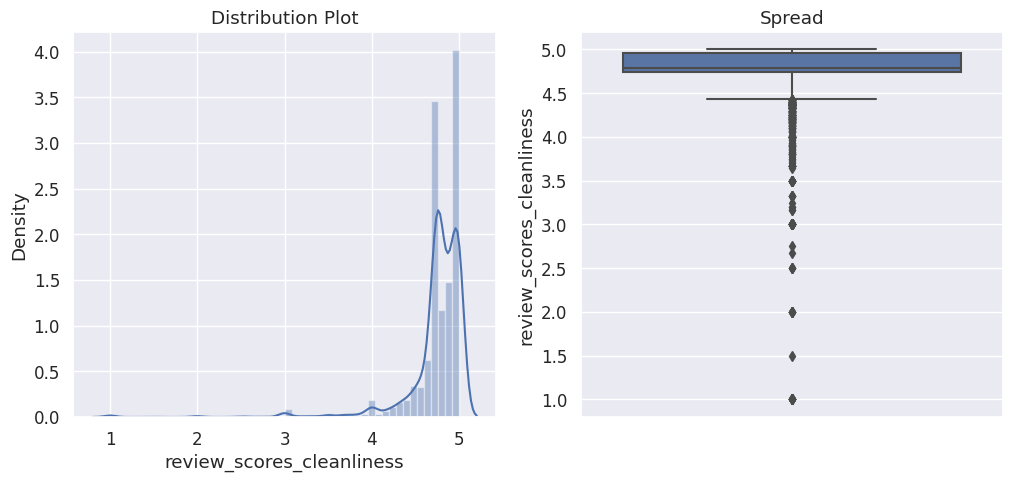

In [1922]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(df_train.review_scores_cleanliness)

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=df_train.review_scores_cleanliness)

plt.show()

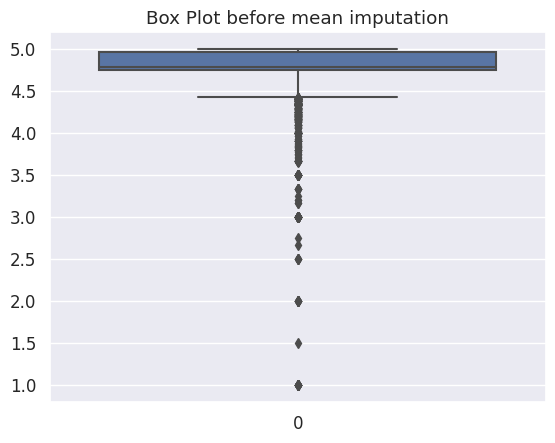

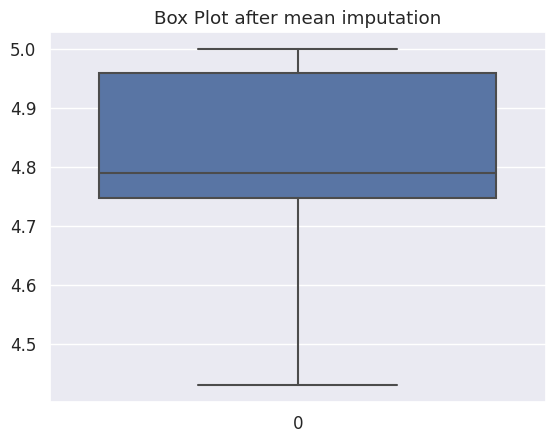

In [1923]:
sns.boxplot(df_train['review_scores_cleanliness'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_train['review_scores_cleanliness'].quantile(0.25)
q3 = df_train['review_scores_cleanliness'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_train['review_scores_cleanliness'])
for i in df_train['review_scores_cleanliness']:
    if i > Upper_tail or i < Lower_tail:
            df_train['review_scores_cleanliness'] = df_train['review_scores_cleanliness'].replace(i, m)
sns.boxplot(df_train['review_scores_cleanliness'])
plt.title("Box Plot after mean imputation")
plt.show()

#### accommodates

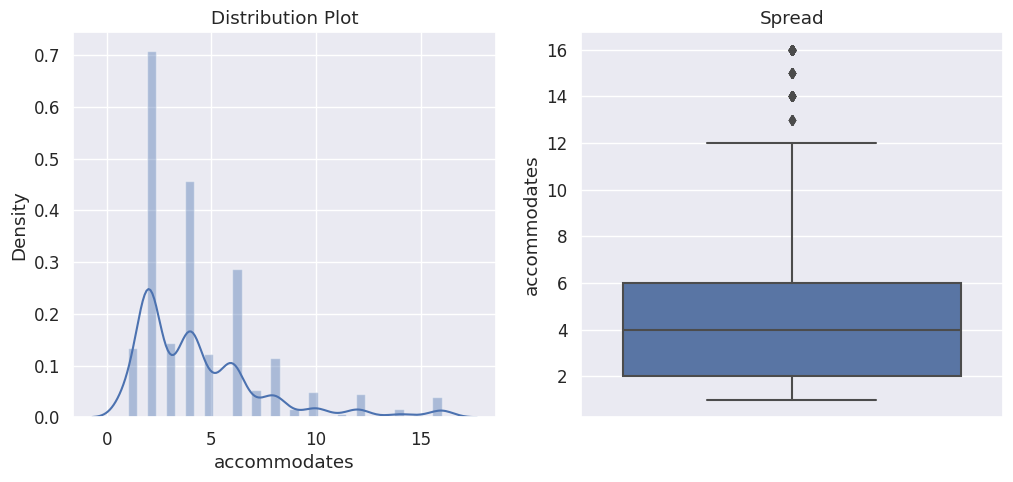

In [1924]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(df_train.accommodates)

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=df_train.accommodates)

plt.show()

## Cleaning and Exploration of Test dataset
### Outlier treatment
We will use same variables as in the treated train df dataset for consistency

#### review_scores_accuracy

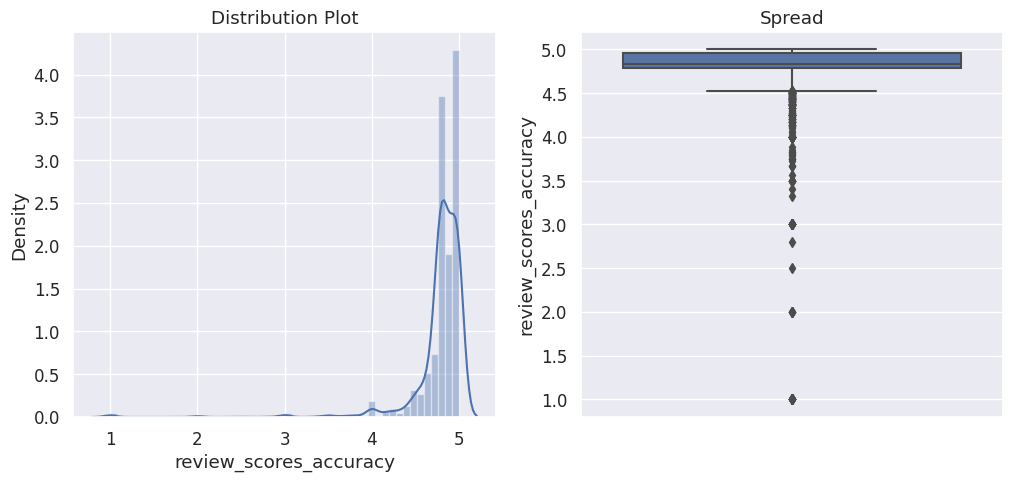

In [1925]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(test_df.review_scores_accuracy)

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=test_df.review_scores_accuracy)

plt.show()

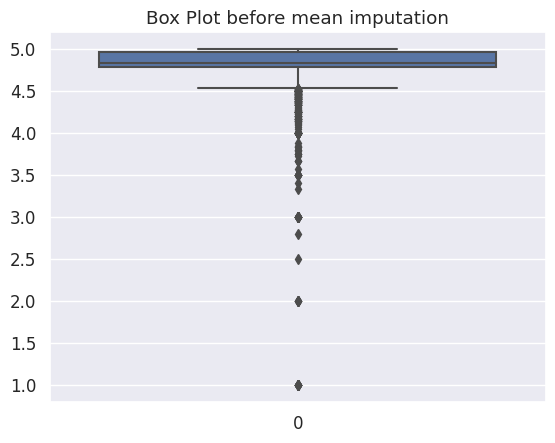

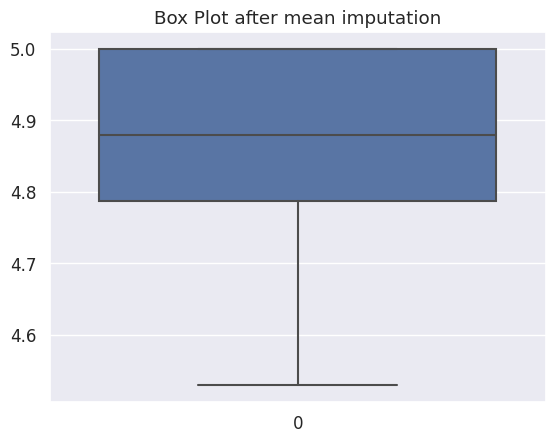

In [1926]:
sns.boxplot(test_df['review_scores_accuracy'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = test_df['review_scores_accuracy'].quantile(0.25)
q3 = test_df['review_scores_accuracy'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = round(np.mean(test_df['review_scores_accuracy']))
for i in test_df['review_scores_accuracy']:
    if i > Upper_tail or i < Lower_tail:
            test_df['review_scores_accuracy'] = test_df['review_scores_accuracy'].replace(i, m)
sns.boxplot(test_df['review_scores_accuracy'])
plt.title("Box Plot after mean imputation")
plt.show()

#### reviews_per_month

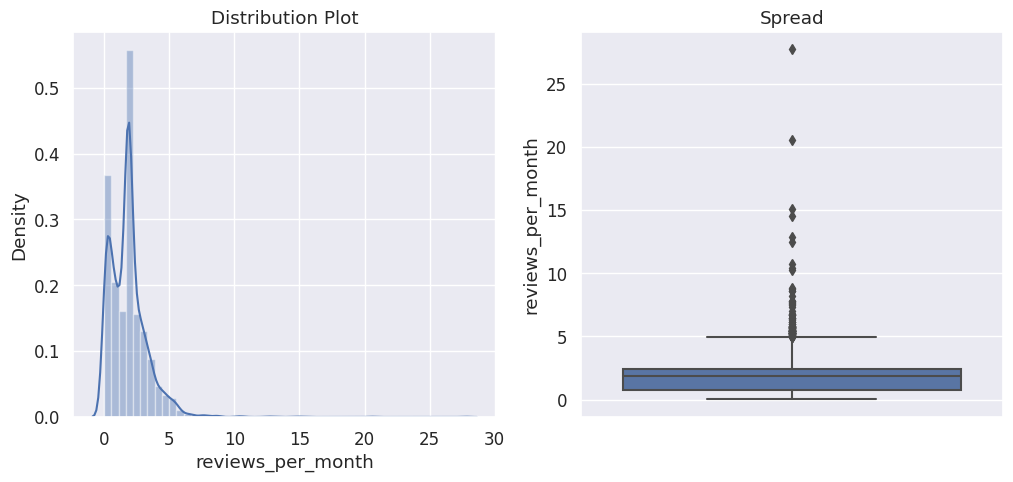

In [1927]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(test_df.reviews_per_month)

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=test_df.reviews_per_month)

plt.show()

In [1928]:
#quick outlier removal 
test_df =test_df[test_df['reviews_per_month'] <=8]

#### beds

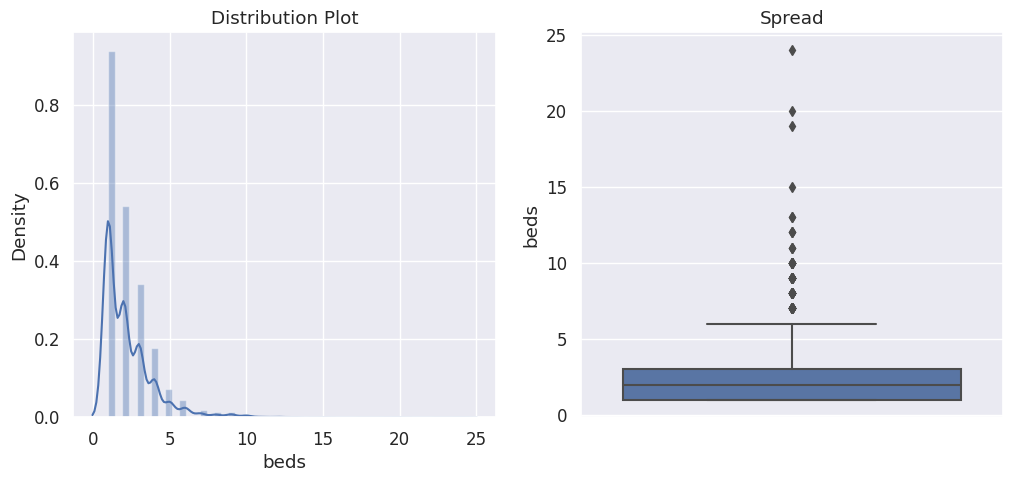

In [1929]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(test_df.beds )

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=test_df.beds)

plt.show()

#### number_of_reviews_ltm

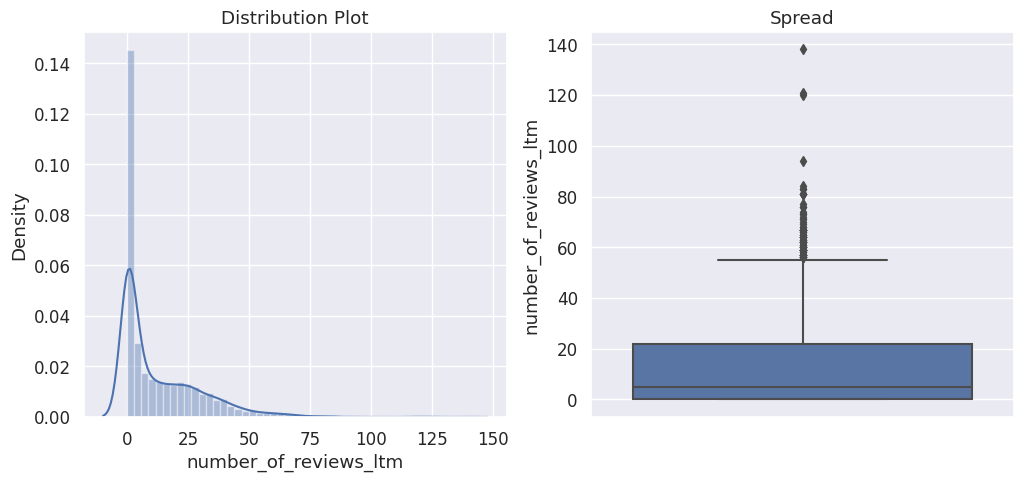

In [1930]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(test_df.number_of_reviews_ltm )

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=test_df.number_of_reviews_ltm )

plt.show()

In [1931]:
#quick outlier removal 
test_df =test_df[test_df['number_of_reviews_ltm'] <=90]

#### review_scores_cleanliness

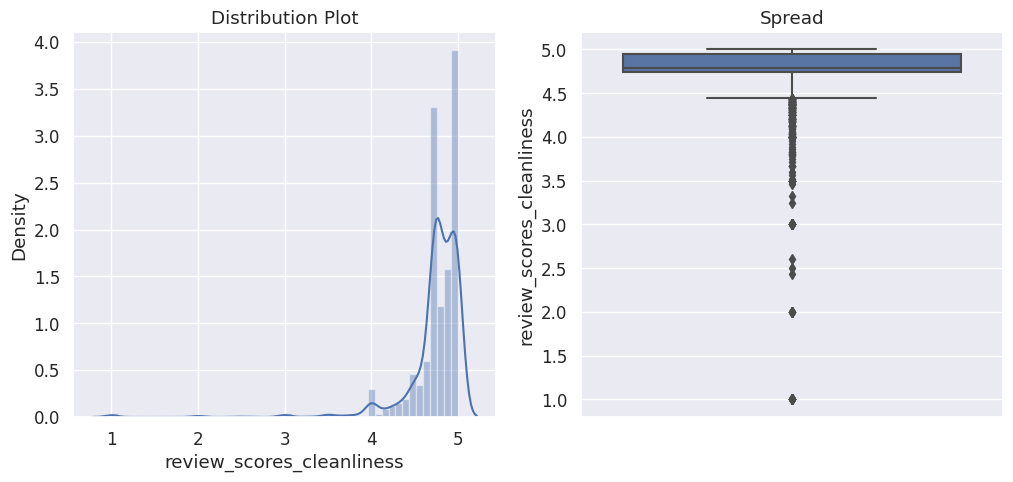

In [1932]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(test_df.review_scores_cleanliness  )

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=test_df.review_scores_cleanliness  )

plt.show()

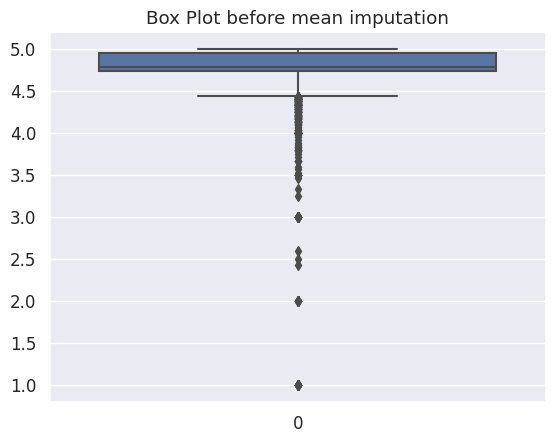

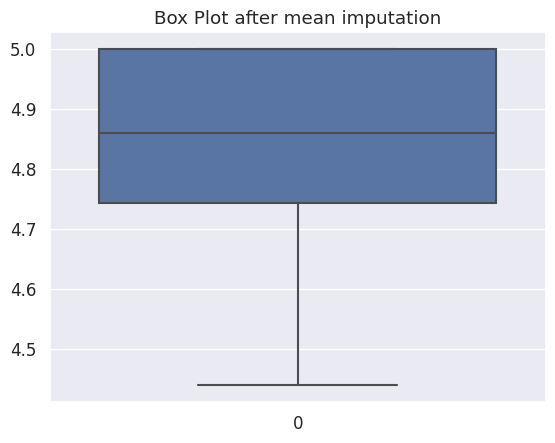

In [1933]:
sns.boxplot(test_df['review_scores_cleanliness'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = test_df['review_scores_cleanliness'].quantile(0.25)
q3 = test_df['review_scores_cleanliness'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = round(np.mean(test_df['review_scores_cleanliness']))
for i in test_df['review_scores_cleanliness']:
    if i > Upper_tail or i < Lower_tail:
            test_df['review_scores_cleanliness'] = test_df['review_scores_cleanliness'].replace(i, m)
sns.boxplot(test_df['review_scores_cleanliness'])
plt.title("Box Plot after mean imputation")
plt.show()

#### calculated_host_listings_count_private_rooms

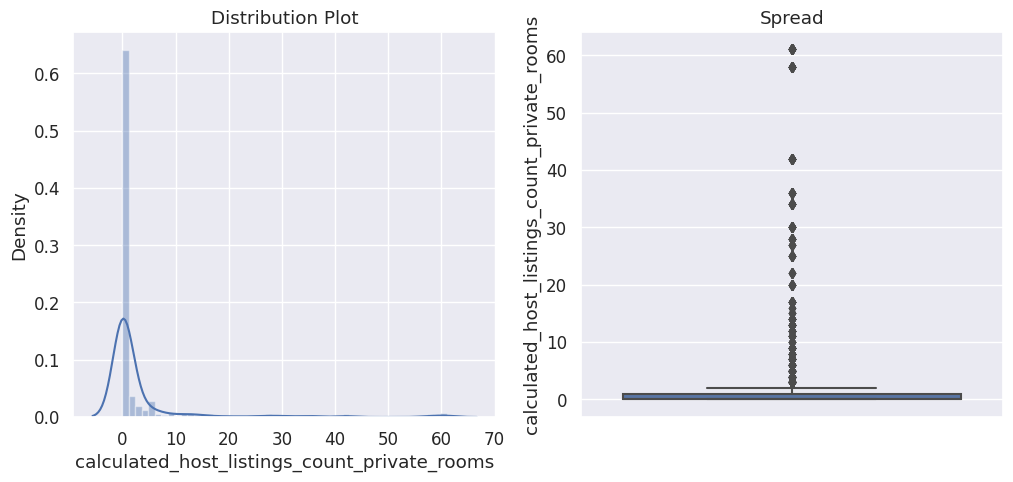

In [1934]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(test_df.calculated_host_listings_count_private_rooms)

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=test_df.calculated_host_listings_count_private_rooms)

plt.show()

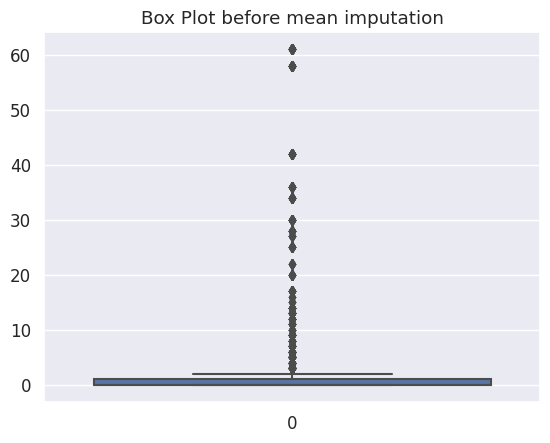

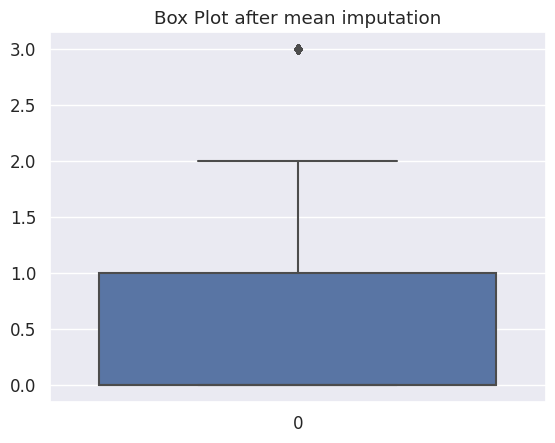

In [1935]:
sns.boxplot(test_df['calculated_host_listings_count_private_rooms'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = test_df['calculated_host_listings_count_private_rooms'].quantile(0.25)
q3 = test_df['calculated_host_listings_count_private_rooms'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = round(np.mean(test_df['calculated_host_listings_count_private_rooms']))
for i in test_df['calculated_host_listings_count_private_rooms']:
    if i > Upper_tail or i < Lower_tail:
            test_df['calculated_host_listings_count_private_rooms'] = test_df['calculated_host_listings_count_private_rooms'].replace(i, m)
sns.boxplot(test_df['calculated_host_listings_count_private_rooms'])
plt.title("Box Plot after mean imputation")
plt.show()

#### minimum_maximum_nights 

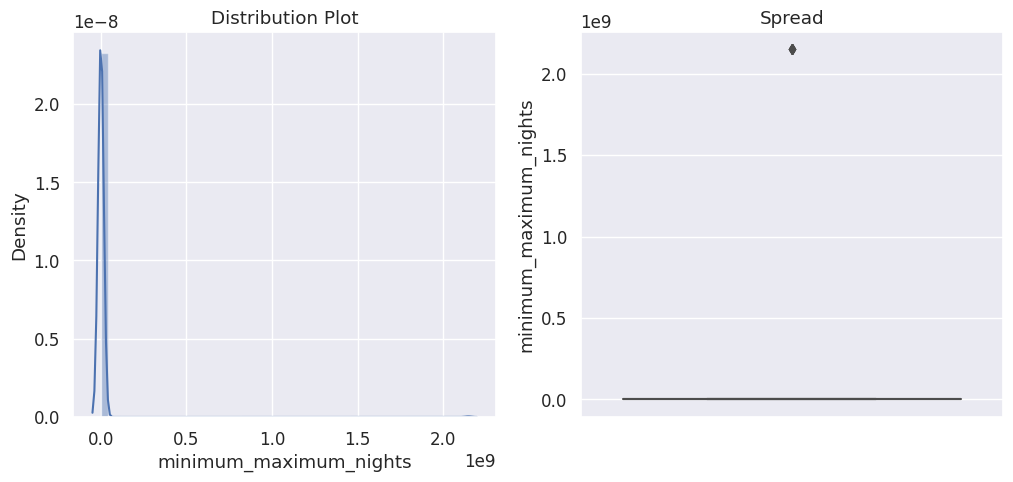

In [1936]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(test_df.minimum_maximum_nights )

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=test_df.minimum_maximum_nights )

plt.show()

#### maximum_maximum_nights

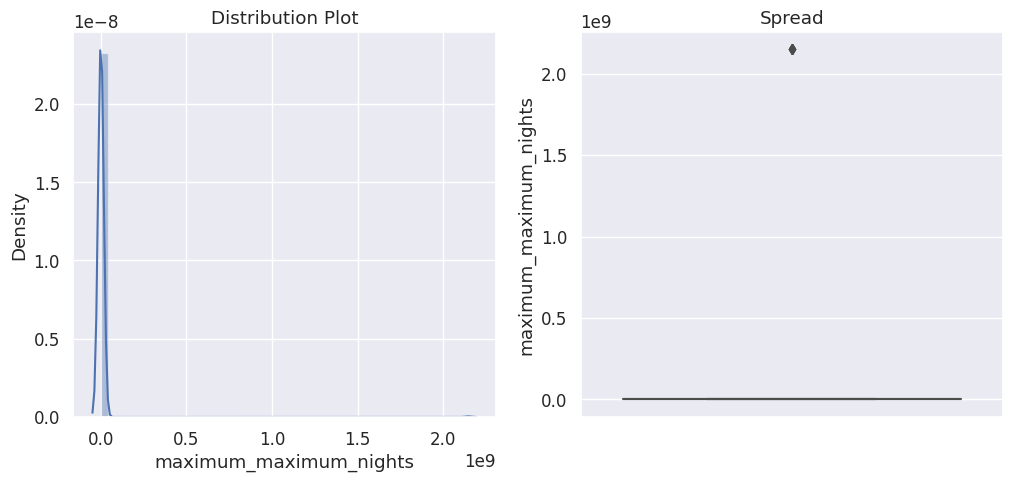

In [1937]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(test_df.maximum_maximum_nights)

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=test_df.maximum_maximum_nights)

plt.show()

In [1938]:
#quick outlier removal 
test_df =test_df[test_df['maximum_maximum_nights'] <= 2147483646]

#### accomodates

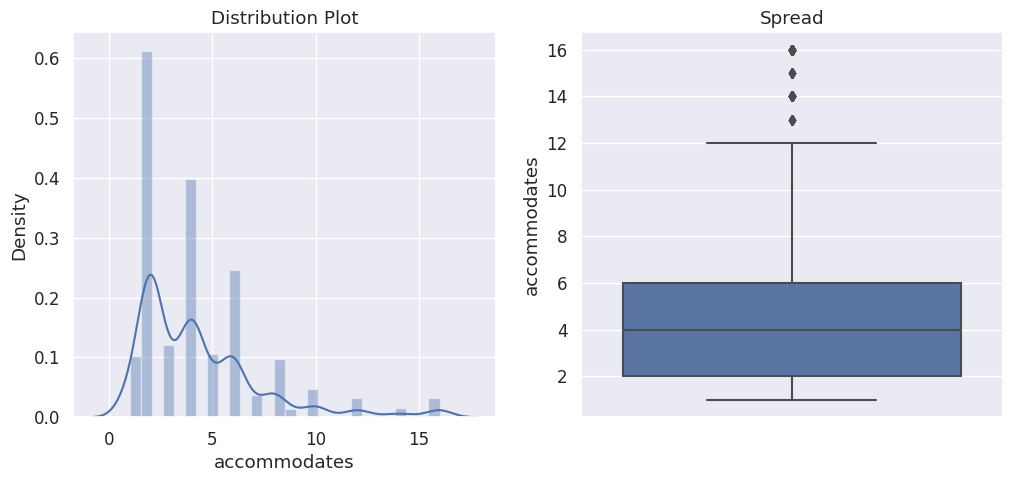

In [1939]:
plt.figure(figsize=(12,5))
sns.set(font_scale=1.1)

plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(test_df.accommodates)

plt.subplot(1,2,2)
plt.title('Spread')
sns.boxplot(y=test_df.accommodates)

plt.show()

### Select columns to be used for regression

In [1940]:
df_train.columns

Index(['maximum_maximum_nights', 'bathrooms_text', 'host_neighbourhood',
       'host_identity_verified',
       'calculated_host_listings_count_private_rooms',
       'review_scores_cleanliness', 'availability_365', 'host_since',
       'property_type', 'beds', 'neighbourhood_cleansed', 'reviews_per_month',
       'accommodates', 'number_of_reviews_ltm', 'host_response_time', 'id',
       'price'],
      dtype='object')

In [1941]:
df_test = test_df[['maximum_maximum_nights', 'bathrooms_text', 'host_neighbourhood',
         'host_identity_verified',
       'calculated_host_listings_count_private_rooms',
       'review_scores_cleanliness', 'availability_365',
        'host_since', 'property_type', 'beds',
        'neighbourhood_cleansed', 
       'number_of_reviews_ltm', 'host_response_time','id']]


### Check for Multicollinearity

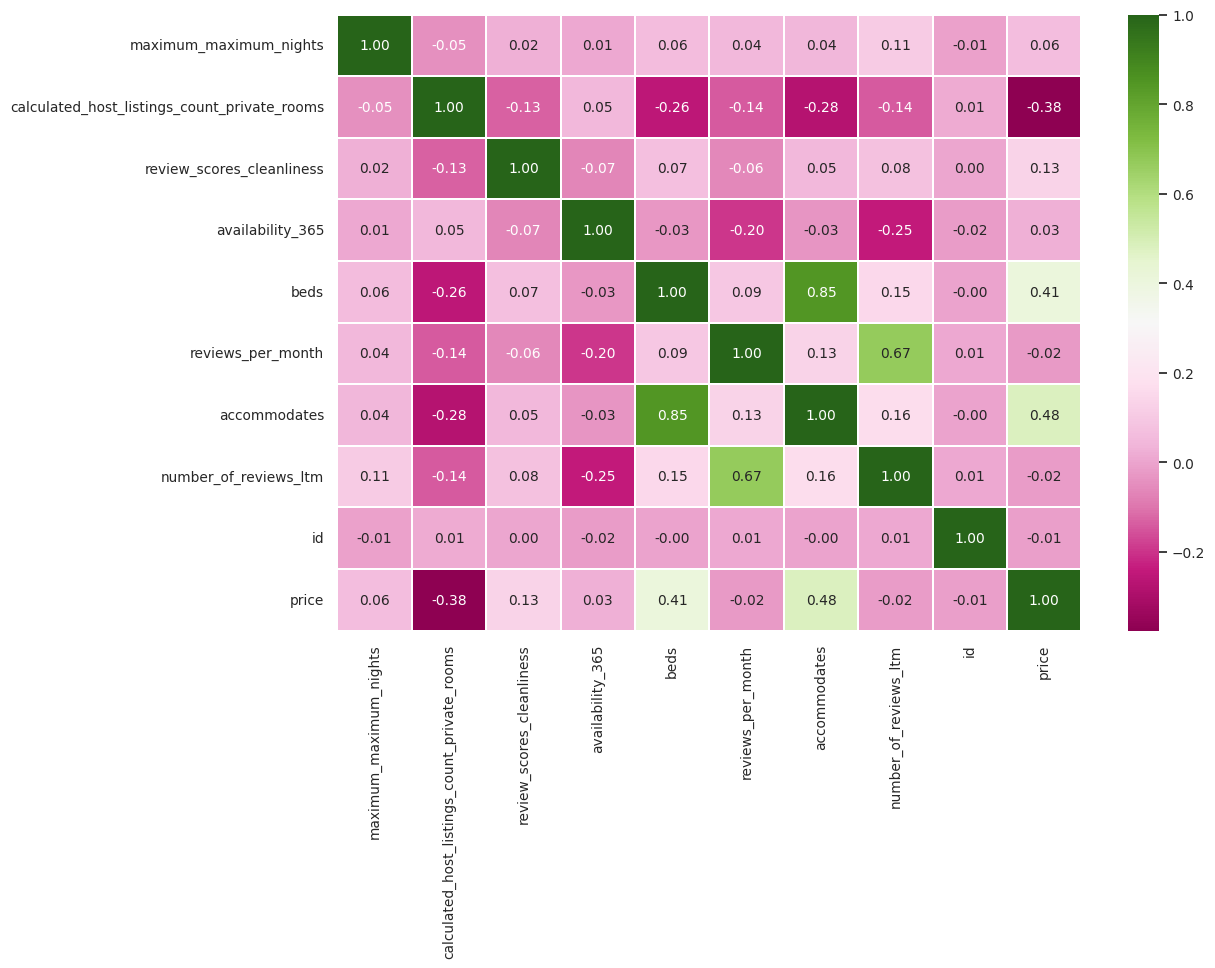

In [1942]:
numeric_columns = df_train.select_dtypes(include=['int','float']).columns
numerictrain = df_train[numeric_columns]

#correlation to check for multicollinearity
sns.set(font_scale=0.9)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(numerictrain.corr(), annot=True, annot_kws={'size': 10}, fmt='.2f', cmap='PiYG', linewidths=.2)
plt.show()

In [1943]:
#multicollinearity exist bewteen 'beds' and 'accomodates'; and  'number_of_reviews_ltm','reviews_per_month'
# Drop two of the columns
columns_to_drop = ['accommodates','reviews_per_month' ]
df_train = df_train.drop(columns=columns_to_drop)


### Encoding all object columns in train and test df


In [1944]:
# Identify common categorical columns
common_columns = list(set(df_train.select_dtypes(include=['object']).columns).intersection(df_test.select_dtypes(include=['object']).columns))

# Apply one-hot encoding with common columns
train_encoded = pd.get_dummies(df_train, columns=common_columns)
test_encoded = pd.get_dummies(df_test, columns=common_columns)

# Ensure that both datasets have the same columns after one-hot encoding
train_encoded, test_encoded = train_encoded.align(test_encoded, axis=1, fill_value=0)

# Extract features (X) and target variable (y) for both datasets
X_train = train_encoded.drop(['price','id'], axis=1)  # Replace 'target' with your actual target variable name
y_train = train_encoded['price']

X_test = test_encoded.drop(['price','id'], axis=1)  # Replace 'target' with your actual target variable name

# Apply StandardScaler
scaler = StandardScaler()

# Fit and transform on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

In [1945]:
X_test_scaled.shape

(3315, 2765)

In [1946]:
X_train_scaled.shape

(4989, 2765)

In [1947]:
y_train.shape

(4989,)

## Regression

In [1948]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

# Evaluate the Model on the Training Data
y_train_pred = model.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print(f'Mean Squared Error (Train): {mse_train}')
print(f'Root Mean Squared Error on Test Set: {rmse_train}')
print(f'R-squared (Train): {r2_train}')

Mean Squared Error (Train): 1380.2279888817257
Root Mean Squared Error on Test Set: 37.151419742477216
R-squared (Train): 0.6934688591829237


In [1949]:
# Convert y_pred to df
predictions_df = pd.DataFrame({'predicted': y_pred})

# Reset indices of X_test['id'] and predictions_df
test_encoded_reset = test_encoded.reset_index(drop=True)
predictions_df_reset = predictions_df.reset_index(drop=True)

predictions = pd.concat([test_encoded_reset['id'], predictions_df_reset], axis=1)

predictions.head()

,id,predicted
0,1034230914292810598,83.112112
1,26579870,136.112112
2,27063669,217.370260
3,21423682,86.370260
4,633433690826539871,94.459291


In [1950]:
# write the DataFrame to a .csv file
predictions.to_csv('/kaggle/working/X_test_with_predictions.csv', index=False)